In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('salaries.csv').drop_duplicates().dropna(how='all')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8594 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8594 non-null   int64 
 1   experience_level    8594 non-null   object
 2   employment_type     8594 non-null   object
 3   job_title           8594 non-null   object
 4   salary              8594 non-null   int64 
 5   salary_currency     8594 non-null   object
 6   salary_in_usd       8594 non-null   int64 
 7   employee_residence  8594 non-null   object
 8   remote_ratio        8594 non-null   int64 
 9   company_location    8594 non-null   object
 10  company_size        8594 non-null   object
dtypes: int64(4), object(7)
memory usage: 805.7+ KB


In [6]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
13967,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
13968,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
13969,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
13970,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
13971,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
# Assuming 'salary_currency' is always USD, drop 'salary_currency' and 'salary_in_usd' columns
df.drop(['salary_currency', 'salary_in_usd'], axis=1, inplace=True)


In [6]:
# Convert 'company_size' column to categorical
df['company_size'] = df['company_size'].astype('category')

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,AU,0,AU,M


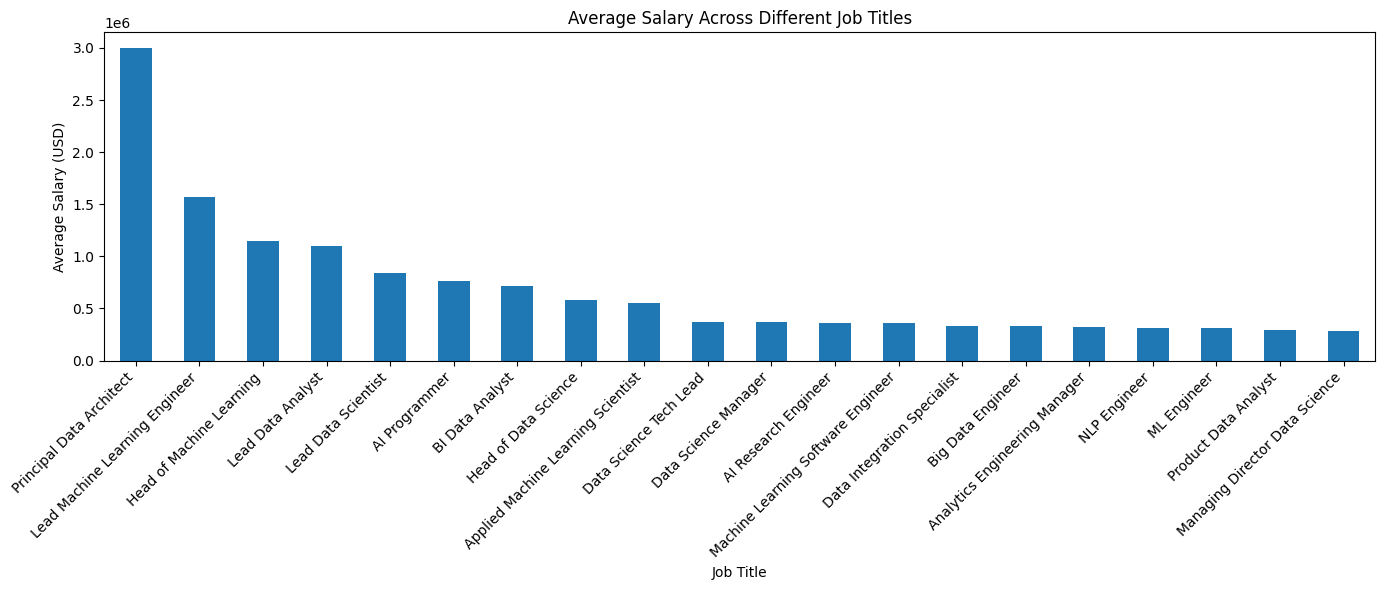

In [22]:
# Salary Distribution across different job titles
plt.figure(figsize=(14, 6))
data = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(20)
data.plot(kind='bar')
plt.title('Average Salary Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

it's evident that roles such as Principal Data Architect, Lead Machine Learning Engineer, and Head of Machine Learning command significantly higher salaries, with figures exceeding the million-dollar mark. On the other hand, positions like Data Integration Specialist, Big Data Engineer, and ML Engineer also offer respectable salaries, albeit comparatively lower than the top-tier roles. This suggests a clear hierarchy in terms of salary distribution within the data science field, with specialized and leadership roles generally receiving higher compensation.

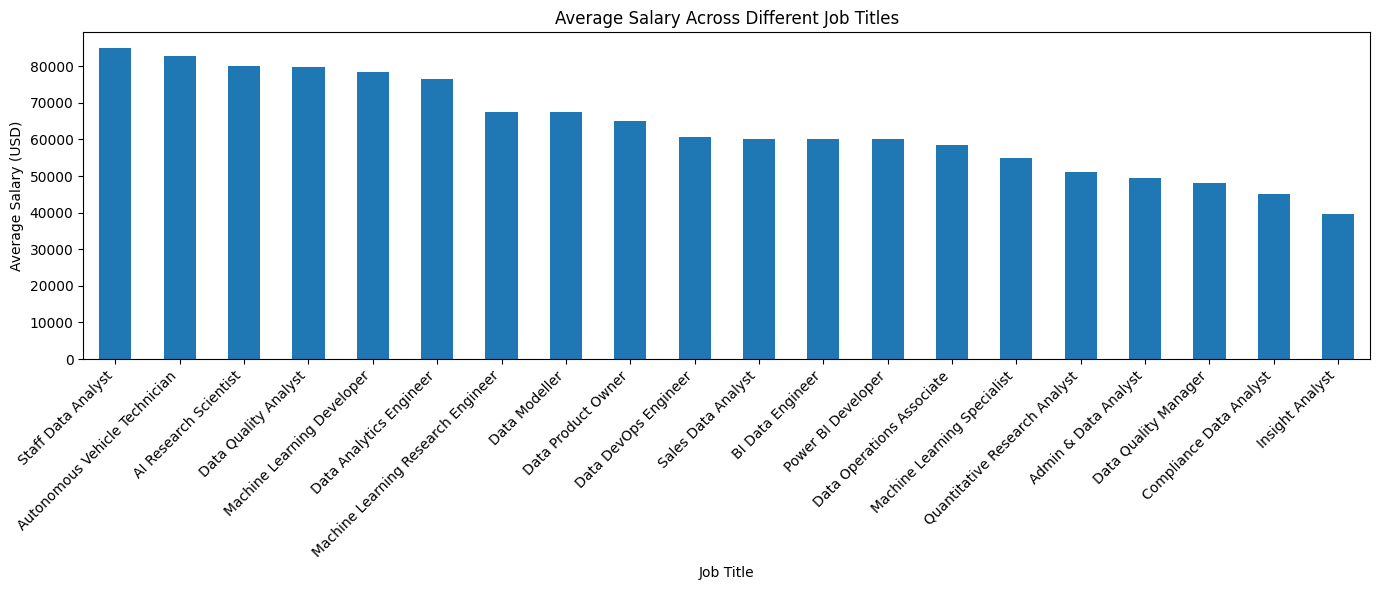

In [12]:
# Salary Distribution across different job titles
plt.figure(figsize=(14, 6))
data2 = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).tail(20)
data2.plot(kind='bar')
plt.title('Average Salary Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

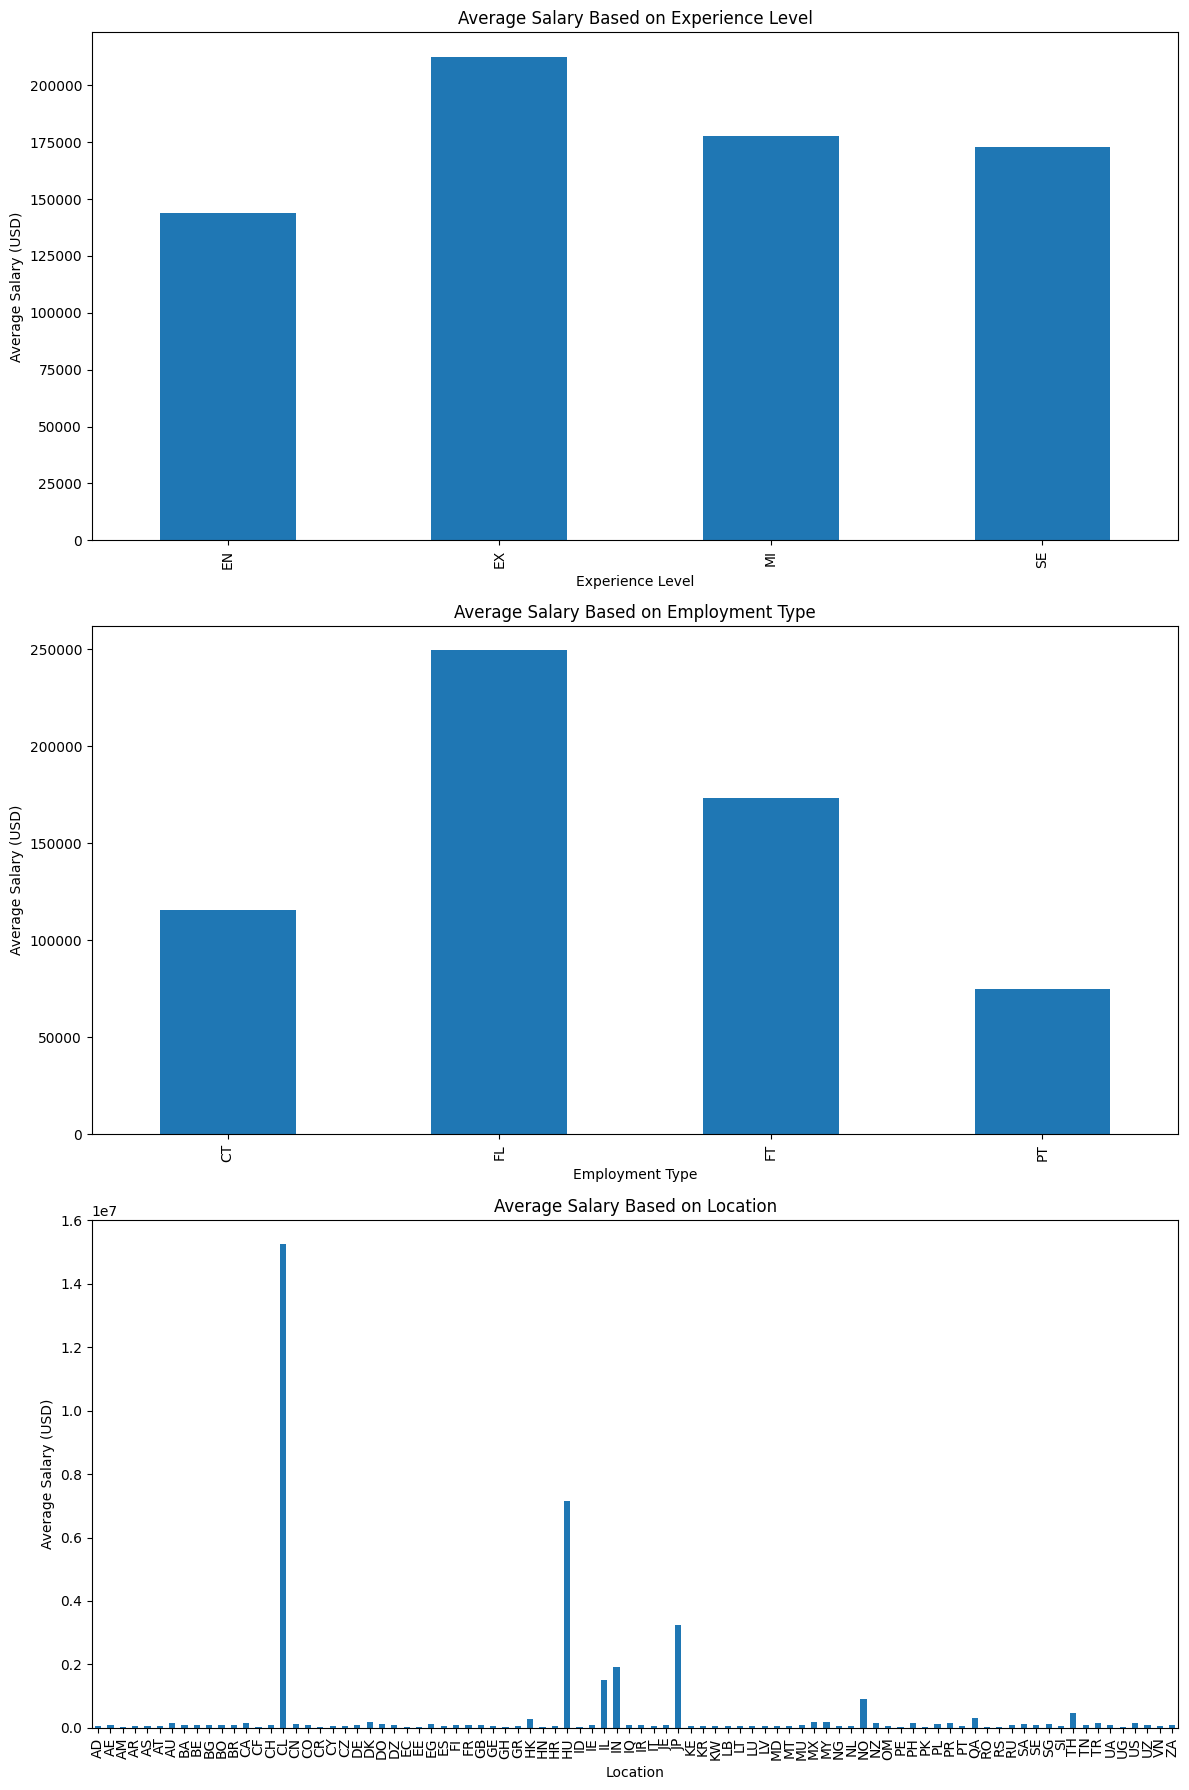

In [14]:
# Salaries variation based on experience level, employment type, and location
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Salary variation based on experience level
data11=df.groupby('experience_level')['salary'].mean()
data11.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Salary Based on Experience Level')
axes[0].set_xlabel('Experience Level')
axes[0].set_ylabel('Average Salary (USD)')

# Salary variation based on employment type
data21=df.groupby('employment_type')['salary'].mean()
data21.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Salary Based on Employment Type')
axes[1].set_xlabel('Employment Type')
axes[1].set_ylabel('Average Salary (USD)')

# Salary variation based on location
data31=df.groupby('employee_residence')['salary'].mean()
data31.plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Salary Based on Location')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Average Salary (USD)')

plt.tight_layout()
plt.show()

The analysis of average salaries based on experience level highlights interesting trends. Executive-level (EX) roles command the highest average salary, followed closely by mid-level (MI) positions, suggesting that experience plays a significant role in salary determination. Regarding employment types, full-time (FT) roles exhibit the highest average salary, while part-time (PT) positions have the lowest, indicating the impact of employment status on earning potential. Additionally, the distribution of salaries based on employee residence reveals substantial variations across different regions, with some locations, like Chile (CL) and Hungary (HU), offering significantly higher average salaries compared to others, underscoring the influence of geographic location on compensation levels.

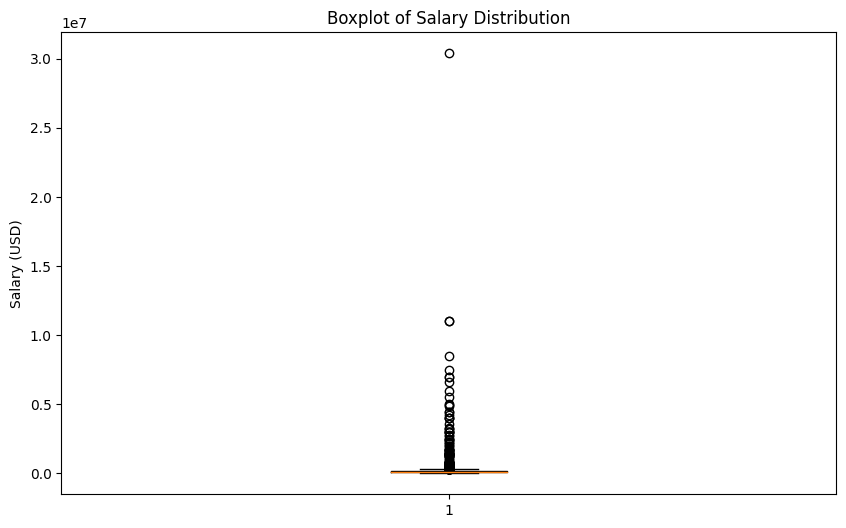

In [31]:
# Identify outliers or anomalies in the salary data
plt.figure(figsize=(10, 6))
plt.boxplot(df['salary'])
plt.title('Boxplot of Salary Distribution')
plt.ylabel('Salary (USD)')
plt.show()

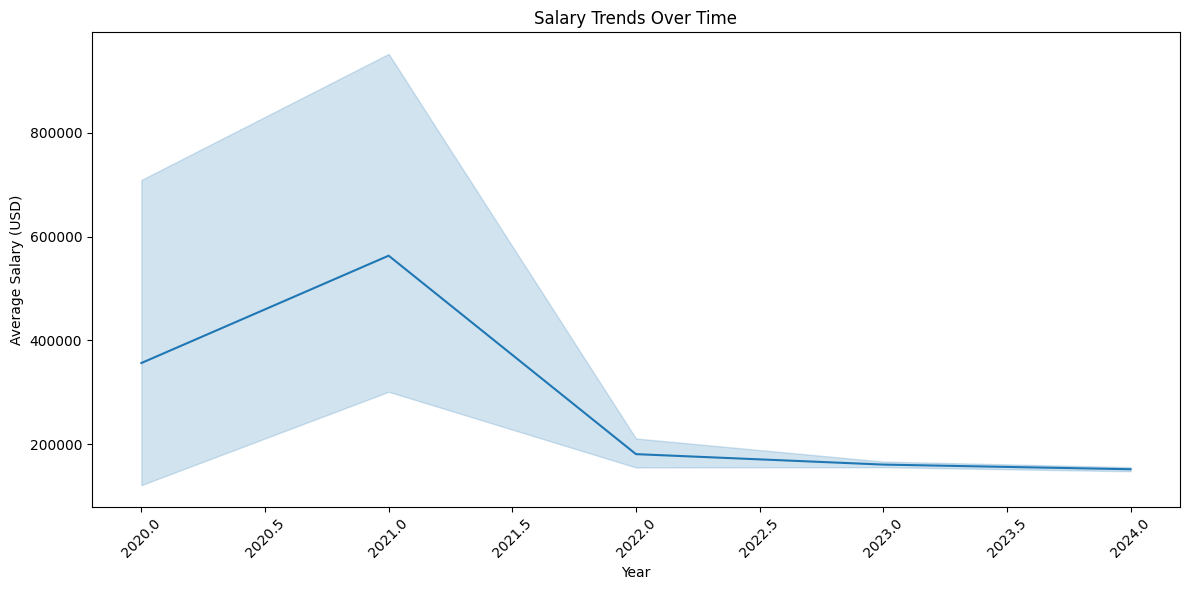

In [36]:
# Trends Over Time: How have salaries changed over the years?
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary', data=df)
plt.title('Salary Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Group by 'work_year' and 'job_title' and calculate the mean salary
job_title_salary = df.groupby(['work_year', 'job_title'])['salary'].mean().unstack()

# 1. Imputation: Fill NaN values with the mean salary across all years for each job title
job_title_salary_imputed = job_title_salary.fillna(job_title_salary.mean())

# 2. Data Filtering: Drop rows with NaN values
job_title_salary_filtered = job_title_salary.dropna()

<Figure size 1200x600 with 0 Axes>

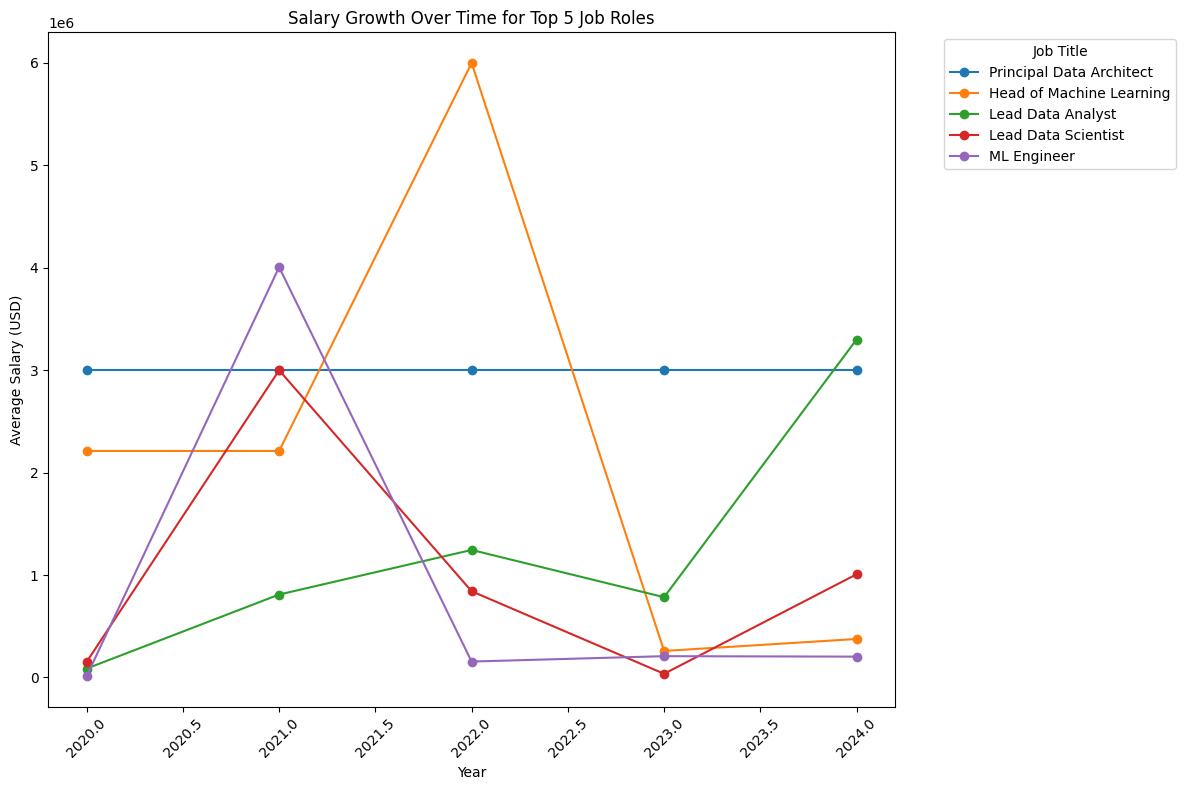

In [39]:
# Trends Over Time: Are certain job roles experiencing significant salary growth?
plt.figure(figsize=(12, 6))
job_title_salary_growth = df.groupby(['work_year', 'job_title'])['salary'].mean().unstack()
# 1. Imputation: Fill NaN values with the mean salary across all years for each job title
job_title_salary_imputed = job_title_salary_growth.fillna(job_title_salary_growth.mean())
# Select top 5 job titles by average salary growth
top_job_titles = job_title_salary_imputed.mean().nlargest(5).index 
 
job_title_salary_imputed[top_job_titles].plot(figsize=(12, 8), marker='o')
plt.title('Salary Growth Over Time for Top 5 Job Roles')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


chart illustrating average salaries for specific job titles over the years, several noteworthy trends emerge. For instance, the salaries for the roles of Principal Data Architect and Head of Machine Learning have remained consistently high across the years, suggesting stable compensation for these leadership positions. Conversely, there are significant fluctuations in salaries for roles like Lead Data Analyst and Lead Data Scientist, indicating potential shifts in demand and market dynamics influencing salary levels over time.

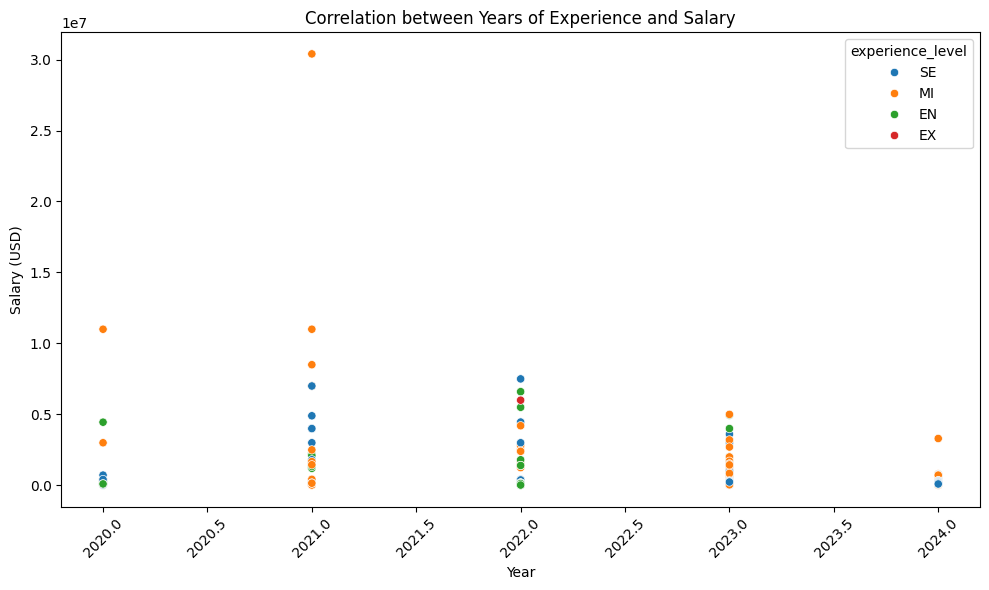

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='work_year', y='salary', hue='experience_level', data=df)
plt.title('Correlation between Years of Experience and Salary')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

job_title,Principal Data Architect,Head of Machine Learning,Lead Data Analyst,Lead Data Scientist,ML Engineer
work_year,,,,,
2020,3000000.0,2.211667e+06,87000.0,1.525000e+05,1.400000e+04
2021,3000000.0,2.211667e+06,810000.0,3.000000e+06,4.006500e+06
2022,3000000.0,6.000000e+06,1245250.0,8.418947e+05,1.555600e+05
2023,3000000.0,2.590000e+05,784000.0,3.600000e+04,2.080597e+05
2024,3000000.0,3.760000e+05,3300000.0,1.007599e+06,2.036405e+05


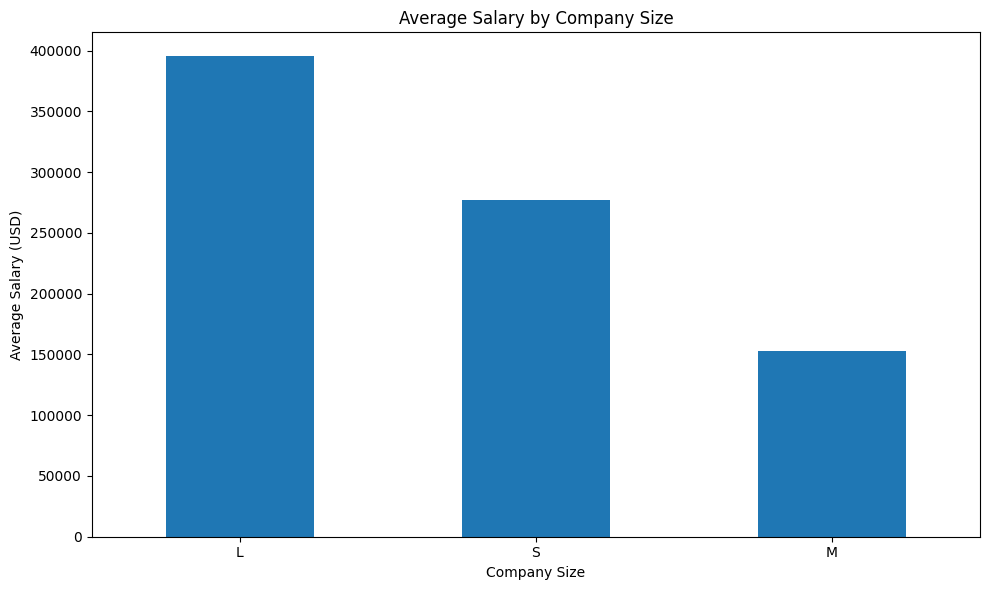

In [47]:
# Company Analysis: How does company size affect salary levels?
plt.figure(figsize=(10, 6))
company_size_salary = df.groupby('company_size')['salary'].mean().sort_values(ascending=False)
company_size_salary.plot(kind='bar')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,AU,0,AU,M


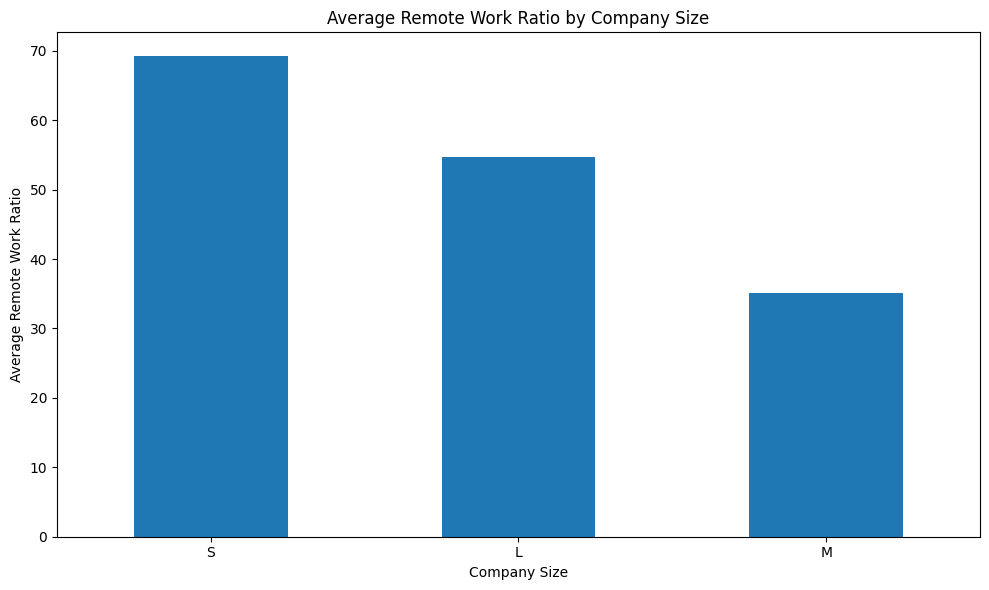

In [51]:
plt.figure(figsize=(10,6))
company_size_remote = df.groupby('company_size')['remote_ratio'].mean().sort_values(ascending=False)
company_size_remote.plot(kind='bar')
plt.title('Average Remote Work Ratio by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Remote Work Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

the output suggests that smaller companies (S) have the highest average remote work ratio at approximately 69.21%, followed by large companies (L) at around 54.74%, and medium-sized companies (M) at approximately 35.13%. This indicates that remote work is more prevalent in smaller companies compared to larger ones, possibly due to greater flexibility and adaptability to remote work arrangements.

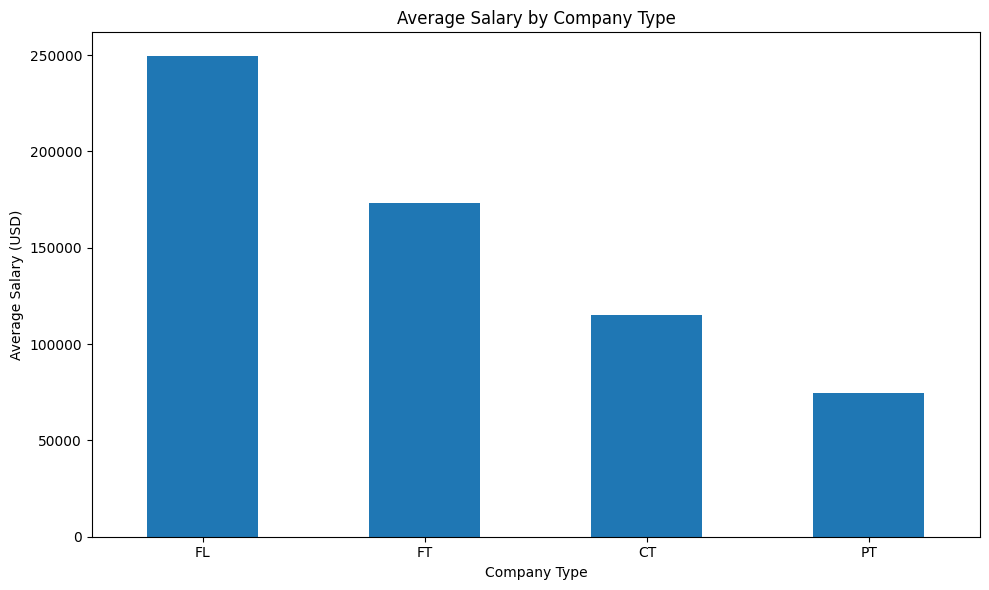

In [54]:
# Company Analysis: Are certain types of companies more likely to offer higher salaries?
plt.figure(figsize=(10, 6))
company_type_salary = df.groupby('employment_type')['salary'].mean().sort_values(ascending=False)
company_type_salary.plot(kind='bar')
plt.title('Average Salary by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

It reveals that freelance (FL) positions offer the highest average salary at approximately $249,379.58, followed by full-time (FT) positions at around $173,221.72. Contract (CT) roles offer a lower average salary, standing at approximately $115,330.62, while part-time (PT) positions have the lowest average salary, approximately $74,737.45. This suggests that freelance roles tend to offer the highest compensation, possibly due to their specialized nature and flexibility, while part-time positions offer comparatively lower salaries.

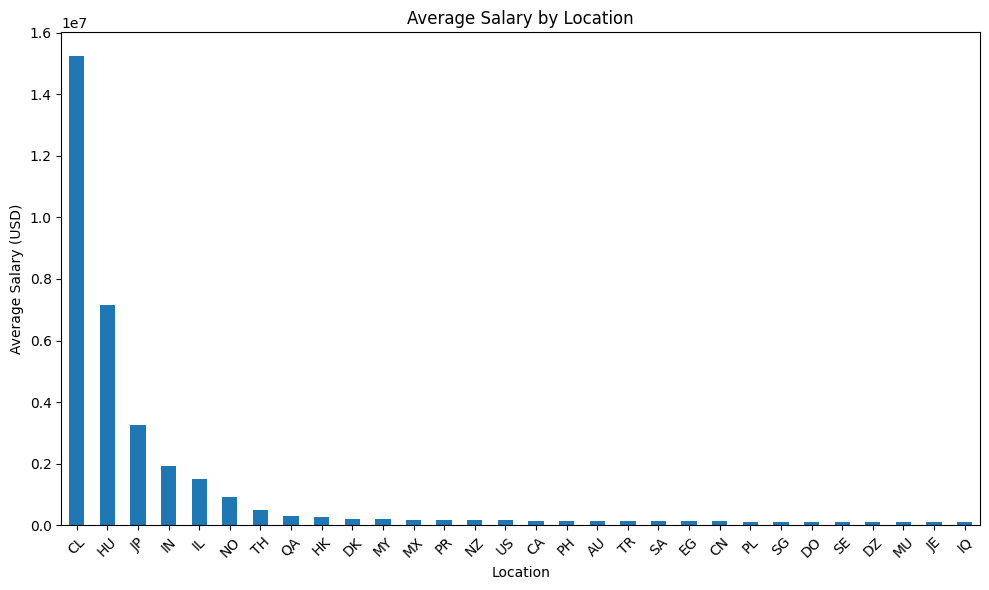

In [57]:
# Geographic Analysis 1: How do salaries differ across different countries or regions?
plt.figure(figsize=(10, 6))
salary_by_location = df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False).head(30)
salary_by_location.plot(kind='bar')  # Vertical bar chart
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

outputs reveal significant disparities in average salaries across different employee residence locations. Regions such as Chile (CL), Hungary (HU), and Japan (JP) stand out with remarkably high average salaries, suggesting robust economic conditions or high demand for specialized skills. Conversely, countries like China (CN) and Egypt (EG) exhibit lower average salaries, indicating potential challenges in wage competitiveness or differing cost of living standards.

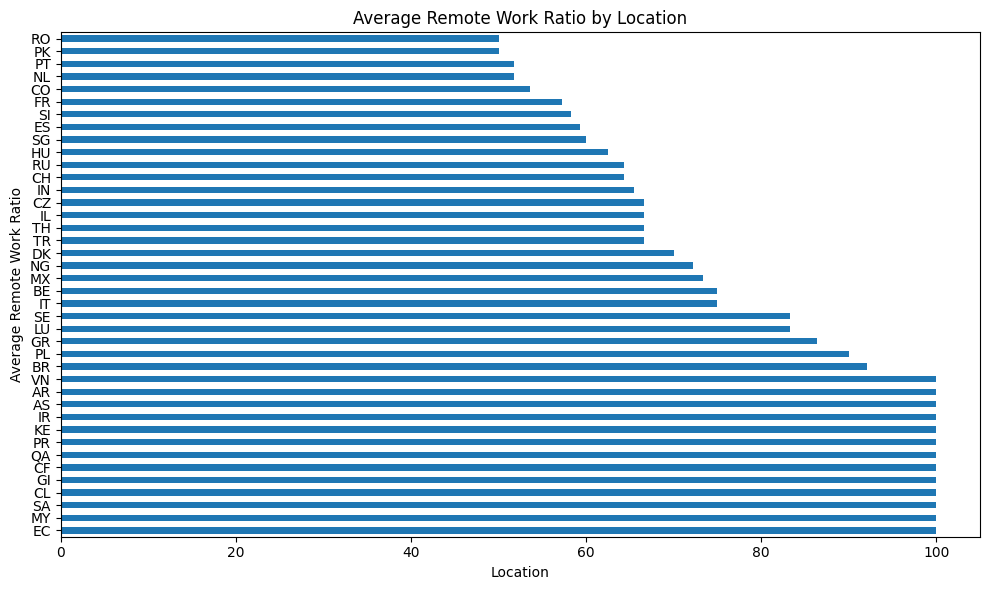

In [83]:
# Geographic Analysis 2: Differences in remote work ratios based on location
plt.figure(figsize=(10, 6))
remote_ratio_by_location = df.groupby('company_location')['remote_ratio'].mean().sort_values(ascending=False).head(40)
remote_ratio_by_location.plot(kind='barh')  # Line chart
plt.title('Average Remote Work Ratio by Location')
plt.xlabel('Location')
plt.ylabel('Average Remote Work Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

the outputs represent the average remote work ratios across various company locations. Locations such as Ecuador (EC), Malaysia (MY), and Saudi Arabia (SA) show a 100% remote work ratio, indicating a prevalent remote work culture in these regions. Conversely, countries like Brazil (BR), Poland (PL), and Greece (GR) have slightly lower remote work ratios, suggesting potential variations in remote work adoption or infrastructure across different regions. 